1. Import libraries and Dataframes
2. Create Histograms
3. Create Bar Chart
4. Create Line Charts
5. Create Scatterplots

In [1]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#Define path
path = r'/Users/joshd/Documents/Personal/CareerFoundry/Instacart Basket Analysis'

In [3]:
#upload orders_products_customers_merge_file
ords_prods_cust_merge = pd.read_pickle(r'/Users/joshd/Documents/Personal/CareerFoundry/Instacart Basket Analysis/02 Data/Prepared Data/orders_products_customers_merged.pkl')

In [4]:
ords_prods_cust_merge.shape

(32404859, 31)

Text(0.5, 0, 'Period of Day')

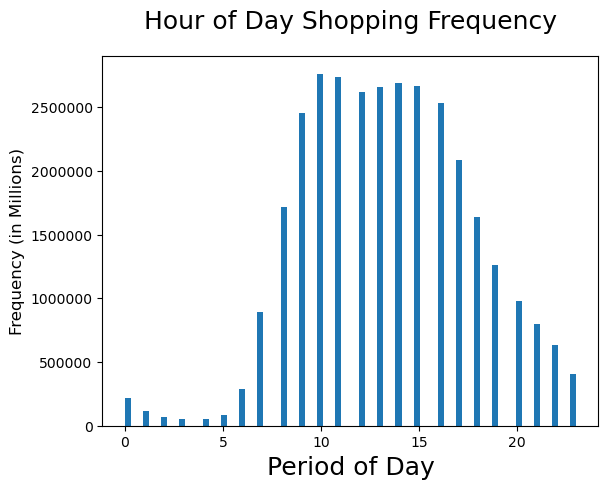

In [5]:
#3orders of the day histogram
hist = ords_prods_cust_merge['order_hour_of_day'].plot.hist(bins = 75)
plt.title('Hour of Day Shopping Frequency', fontsize = 18, pad=20)
plt.ylabel('Frequency (in Millions)', fontsize = 12)
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Period of Day',  fontsize = 18)

#the histogram shows how often people were shipping at certain hours of the day. The most people were ordering groceries between 10am and 4pm

In [6]:
#export visuals histogram
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_hour_of_the_day.png'))

#4 The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

(array([0, 1, 2]),
 [Text(0, 0, 'Regular customer'),
  Text(1, 0, 'Loyal customer'),
  Text(2, 0, 'New customer')])

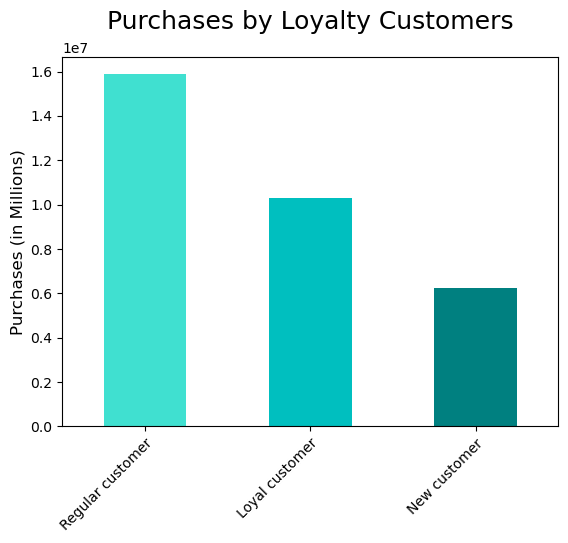

In [7]:
# bar chart loyalty flag
bar = ords_prods_cust_merge['loyalty_flag'].value_counts().plot.bar(color = ['turquoise', 'c','teal'])
plt.title('Purchases by Loyalty Customers', fontsize = 18, pad=20)
plt.ylabel('Purchases (in Millions)', fontsize = 12)
plt.xticks(ha = 'right',rotation_mode='anchor',rotation = 45)

In [8]:
#export visuals bar chart
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_flags.png'))

#5 Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

Text(0.5, 0, 'Hour of the Day')

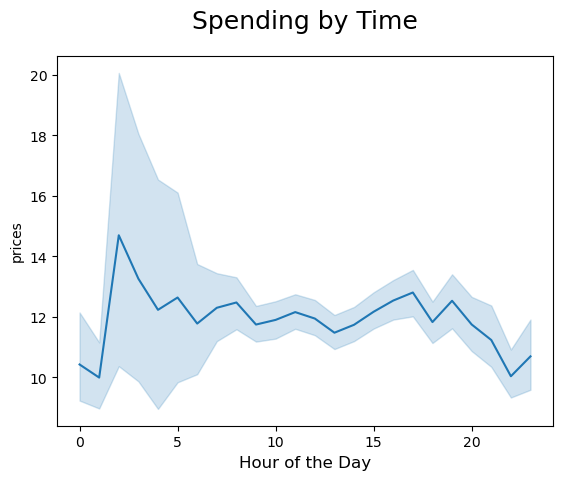

In [9]:
#line chart
line = sns.lineplot(data = ords_prods_cust_merge, x = 'order_hour_of_day',y = 'prices')
plt.title('Spending by Time', fontsize = 18, pad=20)
plt.xlabel('Hour of the Day', fontsize = 12)

In [10]:
#export line chart
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_prices_hours_of_day.png'))

In [11]:
#line chart with sample population-- my computer has 16gb so it is running okay without the sample
#create random sample using seed
np.random.seed(4)
dev = np.random.rand(len(ords_prods_cust_merge)) <= 0.7

In [12]:
#store 70% of data in big dataframe
big = ords_prods_cust_merge[dev]

In [13]:
#store 30% of data in small data frame
small = ords_prods_cust_merge[~dev]

In [14]:
# reduce data set by limiting columns
df_2 = small[['order_hour_of_day','prices']]

Text(0.5, 0, 'Hour of the Day')

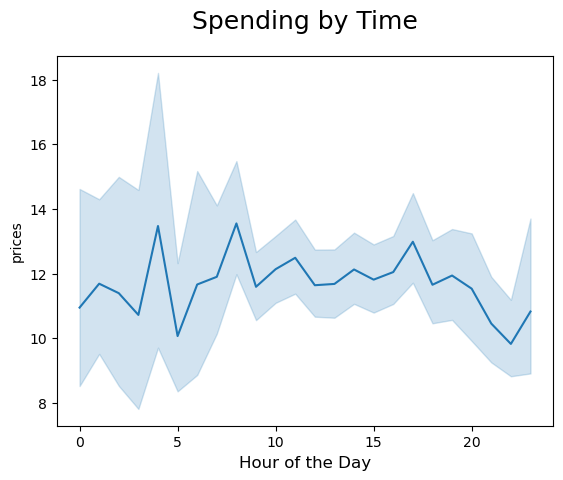

In [15]:
#line chart with sample
line_spending_day = sns.lineplot(data = df_2, x = 'order_hour_of_day',y = 'prices')
plt.title('Spending by Time', fontsize = 18, pad=20)
plt.xlabel('Hour of the Day', fontsize = 12)

In [16]:
#export line chart_2
line_spending_day .figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_spending_day .png'))

#6 Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:
In a markdown cell beneath your line chart, describe what the line chart shows.

Text(0, 0.5, 'Number of Dependants')

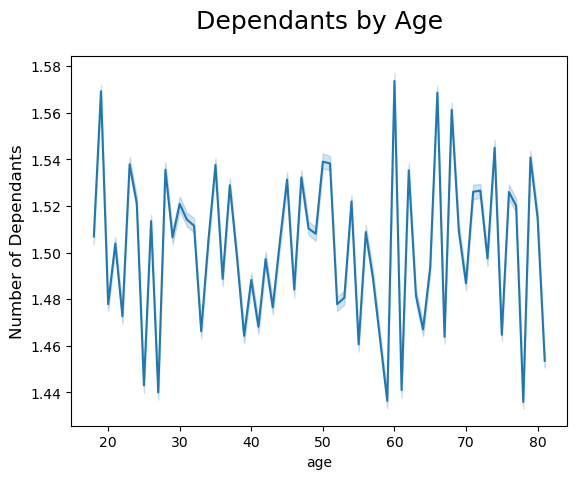

In [17]:
#line chart_2
line_2 = sns.lineplot(data = ords_prods_cust_merge, x = 'age',y = 'number_dependants')
plt.title('Dependants by Age', fontsize = 18, pad=20)
plt.ylabel('Number of Dependants', fontsize = 12)

###the age and dependants line chart shows that those aged 20 to 80 have on average about 1-2 dependants.  Those that are 20 or 60 have the most dependants.  

In [18]:
#export line chart_2
line_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_dependents.png'))

#7 You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.
In a markdown cell beneath your scatterplot, describe what the scatterplot shows.

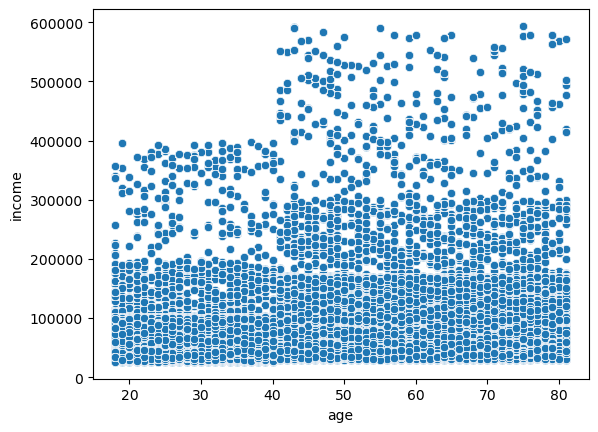

In [19]:
#create scatterplot
scatterplot = sns.scatterplot(x = 'age', y = 'income',data = ords_prods_cust_merge)

The scatterplot shows that there is little correlation between age and income, though as they age there is higher income once they reach 40.  

In [20]:
#export scatterplot
scatterplot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatterplot_age_income.png'))